In [0]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.optim as optim
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from pathlib import Path
import requests
import pickle
import gzip
from matplotlib import pyplot
import math
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

In [0]:
#creating model and training and testing first without modules and then using modules

#getting data

DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"

PATH.mkdir(parents=True, exist_ok=True)

URL = "http://deeplearning.net/data/mnist/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
        content = requests.get(URL + FILENAME).content
        (PATH / FILENAME).open("wb").write(content)

with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
        ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")



[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

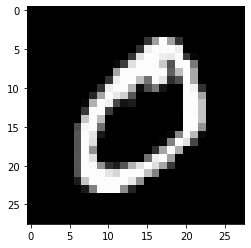

In [3]:
#showing images
print(x_train[1].reshape(28, 28))
pyplot.imshow(x_train[1].reshape(28, 28), cmap='gray')
print(x_train.shape)

In [4]:
#converting to tensor

x_train, y_train, x_valid, y_valid = map(torch.tensor, (x_train, y_train, x_valid, y_valid))

n, c = x_train.shape

x_train, x_train.shape, y_train.min(), y_train.max()
print(x_train, y_train)
print(x_train.shape)
print(y_train.shape)
print(y_train.min(), y_train.max())

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) tensor([5, 0, 4,  ..., 8, 4, 8])
torch.Size([50000, 784])
torch.Size([50000])
tensor(0) tensor(9)


In [0]:
#forming the network

weights=torch.randn(784, 10)/math.sqrt(784)     #Xavier initialisation
weights.requires_grad_()
bias=torch.zeros(10, requires_grad=True)

In [0]:
def log_softmax(x):
    return x-x.exp().sum(-1).log().unsqueeze(-1)

def model(xb):
    return log_softmax(xb@weights+bias)



In [7]:
bs=64
xb=x_train[0:bs]
y_pred=model(xb)

y_pred[0], y_pred.shape
print(y_pred[0], y_pred.shape)

tensor([-2.1579, -2.2083, -2.5883, -2.6018, -2.3373, -2.5132, -1.5315, -2.4394,
        -2.6663, -2.5936], grad_fn=<SelectBackward>) torch.Size([64, 10])


In [0]:
def nll(input, target):
    return -input[range(target.shape[0]), target].mean()

loss=nll

In [9]:
yb=y_train[0:bs]
print(loss(y_pred, yb))

tensor(2.3996, grad_fn=<NegBackward>)


In [10]:
def accuracy(out, target):
    prediction=torch.argmax(out, dim=1)
    return (prediction==target).float().mean()

print(accuracy(y_pred, yb))

tensor(0.1250)


In [11]:
lr=0.0001
epochs=5
t=0
iteration_no=list()
costs=list()
for epoch in range(epochs):
    for i in range((n-1)//bs +1):
        start_i=i*bs
        end_i=start_i+bs
        xb=x_train[start_i:end_i]
        yb=y_train[start_i:end_i]
        y_pred=model(xb)
        cost=loss(y_pred, yb)
        cost.backward()
        with torch.no_grad():
            weights-=lr*weights.grad
            bias-=lr*bias.grad
            weights.grad.zero_()
            bias.grad.zero_()
        if t%200 == 199:
            print(cost, accuracy(y_pred, yb))

        iteration_no.append(t)
        costs.append(cost)
        t+=1

# plt.plot(iteration_no, costs)


tensor(2.3169, grad_fn=<NegBackward>) tensor(0.1406)
tensor(2.3340, grad_fn=<NegBackward>) tensor(0.1562)
tensor(2.2911, grad_fn=<NegBackward>) tensor(0.1562)
tensor(2.2590, grad_fn=<NegBackward>) tensor(0.0938)
tensor(2.2646, grad_fn=<NegBackward>) tensor(0.2500)
tensor(2.1987, grad_fn=<NegBackward>) tensor(0.2188)
tensor(2.2281, grad_fn=<NegBackward>) tensor(0.1875)
tensor(2.1438, grad_fn=<NegBackward>) tensor(0.2969)
tensor(2.1490, grad_fn=<NegBackward>) tensor(0.3750)
tensor(2.2270, grad_fn=<NegBackward>) tensor(0.2812)
tensor(2.1695, grad_fn=<NegBackward>) tensor(0.2500)
tensor(2.1194, grad_fn=<NegBackward>) tensor(0.3438)
tensor(2.1493, grad_fn=<NegBackward>) tensor(0.3125)
tensor(2.0738, grad_fn=<NegBackward>) tensor(0.3750)
tensor(2.0938, grad_fn=<NegBackward>) tensor(0.3281)
tensor(2.0226, grad_fn=<NegBackward>) tensor(0.4375)
tensor(2.0845, grad_fn=<NegBackward>) tensor(0.3750)
tensor(2.1201, grad_fn=<NegBackward>) tensor(0.2969)
tensor(2.0783, grad_fn=<NegBackward>) tensor(0

In [12]:
#MAKING MODEL USING PRE DEFINED MODULES

loss=F.cross_entropy

def model(xb):
    return xb@weights+bias

cost=loss(model(xb), yb)
print(cost, accuracy(model(xb), yb))

tensor(2.0082, grad_fn=<NllLossBackward>) tensor(0.5000)


In [13]:
#using torch.nn Moudle

class Log_Reg(nn.Module):

    def __init__(self):
        super().__init__()
        self.weight=nn.Parameter(torch.randn(784, 10)/math.sqrt(784))
        self.bias=nn.Parameter(torch.randn(10))

    def forward(self, xb):
        return (xb@self.weight)+self.bias

model=Log_Reg()
cost=loss(model(xb), yb)
print(cost, accuracy(model(xb), yb))

tensor(2.8391, grad_fn=<NllLossBackward>) tensor(0.)


In [14]:
#updating parameters

def fit():

    lr=1e-4
    epoches=3
    
    for epoch in range(epoches):
        for i in range((n-1)//bs+1):
            start_i=i*bs
            end_i=start_i+bs
            xb=x_train[start_i:end_i]
            yb=y_train[start_i:end_i]

            y_pred=model(xb)
            cost=loss(y_pred, yb)
            cost.backward()     
            with torch.no_grad():
                for param in model.parameters():
                    param-=lr*param
                model.zero_grad()

fit()
print(loss(model(xb), yb))

tensor(2.6903, grad_fn=<NllLossBackward>)


In [15]:
#using nn.Linear to define model

class Log_Reg1(nn.Module):

    def __init__(self):
        super().__init__()
        self.layer1=nn.Linear(784, 10)
    def forward(self, xb):
        return self.layer1(xb)

model=Log_Reg1()
print(loss(model(xb), yb))

tensor(2.2975, grad_fn=<NllLossBackward>)


In [16]:
fit()
print(loss(model(xb), yb))

tensor(2.2962, grad_fn=<NllLossBackward>)


In [17]:
def get_model():
    model=Log_Reg1()
    return model, optim.SGD(model.parameters(), lr=1e-4)

model, opt=get_model()
print(loss(model(xb), yb))

epoches=2

for epoch in range(epoches):
        for i in range((n-1)//bs+1):
            start_i=i*bs
            end_i=start_i+bs
            xb=x_train[start_i:end_i]
            yb=y_train[start_i:end_i]

            y_pred=model(xb)
            cost=loss(y_pred, yb)
            cost.backward()     
            opt.step()
            opt.zero_grad()

print(loss(model(xb), yb))




tensor(2.3389, grad_fn=<NllLossBackward>)
tensor(2.2242, grad_fn=<NllLossBackward>)


In [18]:
#using TensorDataset

train_ds=TensorDataset(x_train, y_train)

model, opt = get_model()
lr=1e-4
epoches=2
for epoch in range(epoches):
    for i in range((n-1)//bs+1):
        xb, yb = train_ds[i*bs:(i*bs+bs)]
        pred=model(xb)
        cost=loss(pred, yb)
        cost.backward()
        opt.step()
        opt.zero_grad()

print(loss(model(xb), yb))

tensor(2.1772, grad_fn=<NllLossBackward>)


In [19]:
train_ds=TensorDataset(x_train, y_train)
train_dl=DataLoader(train_ds, batch_size=bs)

lr=1e-4
epoches=2

model, opt = get_model()

for epoch in range(epoches):
    for xb, yb in train_dl:
        pred=model(xb)
        cost=loss(pred, yb)
        cost.backward()
        opt.step()
        opt.zero_grad()

print(loss(model(xb), yb))

tensor(2.2160, grad_fn=<NllLossBackward>)


In [28]:
#adding validation set

print(x_train.shape, y_train.shape)

train_ds=TensorDataset(x_train, y_train)
train_dl=DataLoader(train_ds, batch_size=bs, shuffle=True)

valid_ds=TensorDataset(x_valid, y_valid)
valid_dl=DataLoader(valid_ds, batch_size=2*bs)

model, opt = get_model()

epoches=2
lr=1e-4

for epoch in range(epoches):
    model.train()
    for xb, yb in train_dl:

        print(xb.shape)

        pred=model(xb)
        cost=loss(pred, yb)

        cost.backward()
        opt.step()
        opt.zero_grad()

    model.eval()

    with torch.no_grad():
        valid_loss=sum(loss(model(xb), yb) for xb, yb in valid_dl)

    print(epoch, valid_loss/len(valid_dl))

torch.Size([50000, 784]) torch.Size([50000])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Size([64, 784])
torch.Siz

In [0]:
def cost_batch(model, loss, xb, yb, opt=None):
    pred=model(xb)
    cost=loss(pred, yb)

    if opt is not None:
        cost.backward()
        opt.step()
        opt.zero_grad()

    return cost.item(), len(xb)

def fit(epochs, model, loss, opt, train_dl, valid_dl):

    for epoch in range(epochs):
        model.train()
        for xb, yb in  train_dl:
            cost_batch(model, loss, xb, yb, opt)

        model.eval()

        with torch.no_grad():
            costs, nums = zip(*[cost_batch(model, loss, xb, yb) for xb, yb in valid_dl])

        val_loss=np.sum(np.multiply(costs, nums))/np.sum(nums)
        print(epoch, val_loss)
            

In [0]:
def get_data(train_ds, valid_ds, bs):
    return (
        DataLoader(train_ds, batch_size=bs, shuffle=True),
        DataLoader(valid_ds, batch_size=bs * 2),
    )

In [23]:
train_dl, valid_dl = get_data(train_ds, valid_ds, bs)
model, opt = get_model()
fit(epochs, model, loss, opt, train_dl, valid_dl)

0 2.204523950958252
1 2.127118599319458
2 2.054969688796997
3 1.9873253704071046
4 1.923686374282837


In [24]:
#SWITCHING TO CNNs

class CNN_model(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1)
        self.conv2=nn.Conv2d(16, 16, kernel_size=3, stride=2, padding=1)
        self.conv3=nn.Conv2d(16, 10, kernel_size=3, stride=2, padding=1)

    def forward(self, xb):
        xb=xb.view(-1, 1, 28, 28)
        xb=F.relu(self.conv1(xb))
        xb=F.relu(self.conv2(xb))
        xb=F.relu(self.conv3(xb))
        xb=F.avg_pool2d(xb, 4)
        return xb.view(-1, xb.size(1))

learning_rate=0.01
momentum=0.9
epochs=3

modell=CNN_model()
opt=optim.SGD(modell.parameters(), lr=learning_rate, momentum=momentum)

fit(epochs, modell, loss, opt, train_dl, valid_dl)

0 1.473481192779541
1 0.7581049556732178
2 0.5088940442085266


In [25]:
#using sequential 

class Lambda(nn.Module):
    def __init__(self, func):
        super().__init__()
        self.func=func

    def forward(self, x):
        return self.func(x)

def Preprocess(x):
    return x.view(-1, 1, 28, 28)

model=nn.Sequential(
    Lambda(Preprocess),
    nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 10, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.AvgPool2d(4),
    Lambda(lambda x : x.view(x.size(0), -1))
)

opt = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

fit(epochs, model, loss, opt, train_dl, valid_dl)

0 2.297746491241455
1 1.3025002534866332
2 0.66527218542099


In [26]:
#using wrapped data loader

def PreProcess(x, y):
    return x.view(-1, 1, 28, 28), y

class WrappedDataLoader:
    def __init__(self, dl, func):
        self.dl=dl
        self.func=func

    def __len__(self):
        return len(self.dl)

    def __iter__(self):
        batches=iter(self.dl)
        for batch in batches:
            yield(self.func(*batch))

train_dl, valid_dl = get_data(train_ds, valid_ds, bs)
train_dl = WrappedDataLoader(train_dl, PreProcess)
valid_dl = WrappedDataLoader(valid_dl, PreProcess)

model=nn.Sequential(
    nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 10, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.AdaptiveAvgPool2d(4),
    Lambda(lambda x : x.view(x.size(0), -1))
)

opt = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

fit(epochs, model, loss, opt, train_dl, valid_dl)

0 1.7417524204254151
1 1.572399217224121
2 1.4922173189163208


# New Section